In [1]:
import tensorflow as tf

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image=cv2.imread("test/0/PrivateTest_88305.jpg")

In [7]:
image.shape

(48, 48, 3)

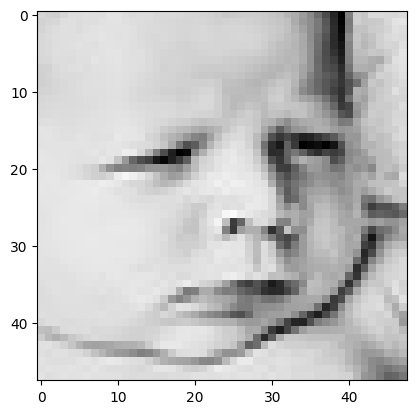

In [8]:
plt.imshow(image)

In [9]:
data_dir="train/"

In [10]:
classes=["0","1","2","3","4","5","6"]

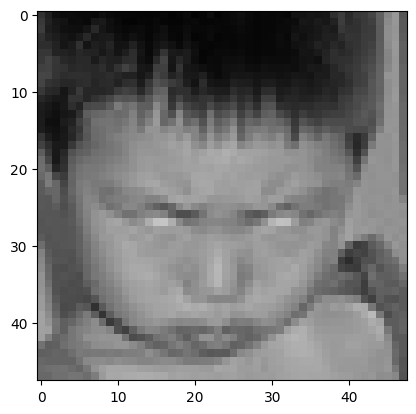

In [11]:
for cat in classes:
    path=os.path.join(data_dir,cat)
    for image in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,image))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

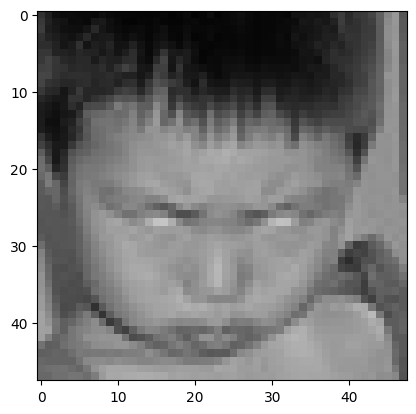

In [12]:
size=224
new_array=cv2.resize(img_array,(size,size))
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
training_data =[]
def create_training_data():
    for cat in classes:
        path=os.path.join(data_dir,cat)
        class_num=classes.index(cat)
        for img in os.listdir(path):
            try:
                imag_array=cv2.imread(os.path.join(path,img))
                new_img=cv2.resize(imag_array,(size,size))
                training_data.append([new_img,class_num])
            except Exception as e:
                pass
                
                
         

In [14]:
create_training_data()

In [15]:
len(training_data)

28709

In [16]:
import random

In [17]:
random.shuffle(training_data)

In [18]:
X=[]
Y=[]
for features,labels in training_data:
    X.append(features)
    Y.append(labels)
X=np.array(X).reshape(-1,size,size,3) 

In [19]:
X=X/255

In [17]:
X[0]

array([[[0.5254902 , 0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157]],

       [[0.5254902 , 0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157]],

       [[0.5254902 , 0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        [0.52156863, 0.52156863, 0.52156863],
        ...,
        [0.2       , 0.2       , 0.2       ],
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157]],

       ...,

       [[0.50980392, 0.50980392, 0.50980392],
        [0.50980392, 0.50980392, 0.50980392],
        [0.50980392, 0

In [20]:
Y=np.array(Y)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
model=tf.keras.applications.MobileNetV2()

In [5]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
base_input=model.layers[1].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_output

In [ ]:
base_input

In [ ]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(65)(final_output)
final_output=layers.Activation("relu")(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)


In [ ]:
final_output

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [29]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,799 (9.27 MB)

 Trainable params: 2,396,687 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [31]:
new_model.fit(X,Y,epochs=25)

Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 981s 1s/step - accuracy: 0.4782 - loss: 1.3724
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 1183s 1s/step - accuracy: 0.5927 - loss: 1.0874
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 671s 747ms/step - accuracy: 0.6302 - loss: 0.9929
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 594s 661ms/step - accuracy: 0.6592 - loss: 0.9244
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 617s 688ms/step - accuracy: 0.6788 - loss: 0.8685
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 1363s 2s/step - accuracy: 0.6930 - loss: 0.8196
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 578s 643ms/step - accuracy: 0.7260 - loss: 0.7574
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 582s 648ms/step - accuracy: 0.7311 - loss: 0.7339
Epoch 9/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 623s 694ms/step - accuracy: 0.7628 - loss: 0.6529
Epoch 10/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 730s 813ms/step - accuracy: 0.7844 - loss: 0.6063
Epoch 11/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 895s 997ms/step - accuracy: 0.7977 - loss: 0.5538
Epoch 12/25
898

In [18]:
new_model.save('badr.h5')

NameError: name 'new_model' is not defined

In [6]:
new_model=tf.keras.models.load_model("badr.h5")

In [7]:
from tensorflow.keras.models import load_model

# Chargez le modèle avec compile=False si nécessaire
new_model = load_model("badr.h5", compile=False)

# Vérifiez l'architecture
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [78]:
image_test=cv2.imread("happy-boy-16053248.webp")

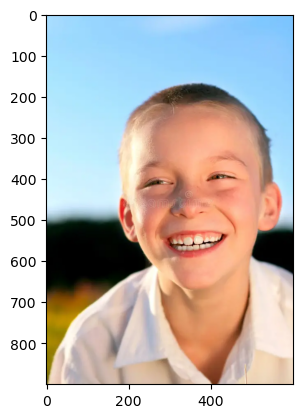

In [84]:
plt.imshow(cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB))

In [86]:
image_test.shape

(900, 600, 3)

In [1]:
import os
print(os.path.exists("badr.h5"))


True


In [16]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)  # Keras is included in TensorFlow


TensorFlow version: 2.10.0
Keras version: 2.10.0


In [17]:
import h5py
with h5py.File("badr.h5", "r") as f:
    print("Keras version:", f.attrs.get("keras_version"))
    print("Backend version:", f.attrs.get("backend"))


Keras version: 3.6.0
Backend version: tensorflow


In [10]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if faceCascade.empty():
    raise IOError("Erreur : Impossible de charger le classificateur de visage.")


In [11]:
pip show opencv-python


Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\badrm\anaconda3\envs\tf\lib\site-packages
Requires: numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur : Impossible de lire l'image.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Tester avec différents paramètres
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    print(f"Visages détectés : {len(faces)}")

    # Dessiner les rectangles autour des visages détectés
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow("Face Detection Test", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détectés : 1
Visages détec

In [14]:
print("Classificateur chargé :", not faceCascade.empty())


Classificateur chargé : True


In [15]:
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))


In [16]:
for i, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(frame, f"Face {i+1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


In [17]:
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (640, 480))
out.write(frame)


In [18]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, 1.1, 3)


In [28]:
print("Input shape du modèle :", model.input_shape)



Input shape du modèle : (None, 48, 48, 1)


In [30]:
import cv2
import numpy as np
import tensorflow as tf

# Charger le modèle d'émotions
model = tf.keras.models.load_model("emotion_model_final.keras")
emotion_labels = ["Colère", "Dégoût", "Peur", "Joie", "Tristesse", "Surprise", "Neutre"]

# Charger le classificateur de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convertir en niveaux de gris

    # Détection des visages
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extraire et redimensionner le visage en 48x48 (compatible avec le modèle)
        face_roi = gray[y:y + h, x:x + w]
        face_resized = cv2.resize(face_roi, (48, 48))

        # Normaliser (entre 0 et 1)
        face_resized = face_resized / 255.0

        # Adapter la forme (batch_size=1, height=48, width=48, channels=1)
        face_resized = np.expand_dims(face_resized, axis=(0, -1))

        # Faire la prédiction
        prediction = model.predict(face_resized)
        emotion = emotion_labels[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Dessiner le rectangle et afficher l'émotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, f"{emotion} ({confidence:.2f}%)", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Détection d'émotions", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━